<div align="center" style="font-size: 40%; text-align: center; margin: 0 auto">
  <img src="https://media.licdn.com/dms/image/v2/D4E03AQFyxl108wiYdQ/profile-displayphoto-shrink_800_800/profile-displayphoto-shrink_800_800/0/1731075663012?e=1740009600&v=beta&t=q8KMur70v2sybz2H3GQFStBl5yASBt3sOWyX790cgRs"  
       style="display: block; margin-left: auto; margin-right: auto; width: 150px; height: 150px; border-radius: 50%;"/>
</div>

# Lagos State Rooftop Solar Potential Dashboard

Nigeria, with an average solar irradiance of [5.5 kWh/m²/day](https://wjarr.com/content/challenges-and-opportunities-nigerias-renewable-energy-policy-and-legislation), holds immense potential for utilizing solar energy, especially in urban areas like Lagos with dense building distributions. With the increasing demand for sustainable energy solutions, Lagos State, as a bustling urban hub in Nigeria, presents a significant opportunity for rooftop solar energy adoption. 

This project focuses on leveraging geospatial data to assess and visualize the rooftop solar potential of Lagos State. The dataset includes detailed information on over **1.5 million building polygons**, with attributes such as total rooftop area, potential installable solar capacity, and annual energy potential. The insights derived from this project aim to support stakeholders in the renewable energy sector, policymakers, and businesses in making data-driven decisions for promoting solar energy adoption.

<div align="center" style=" font-size: 5%; text-align: center; margin: 0 auto">
<img src="https://paintmaps.com/og_image/map_chart/map_chart_1424c.png"  style="display: block; margin-left: auto; margin-right: auto; width: 50%;";/>
</div>

## Key Features of the Project:
- Dataset Overview: A comprehensive dataset containing features like rooftop surface area, energy potential, peak installable capacity, building types, roof quality, and solar installation status.
  
- Analytical Insights: Identification of high-potential areas, existing solar adoption gaps, and efficiency hotspots.

- Interactive Dashboard: A user-friendly Power BI dashboard visualizing solar potential across Lagos, enabling stakeholders to explore key metrics like energy output, installation capacity, and building suitability.

## Data dictionary

I got the dataset used in this analysis from [energydata.info](https://energydata.info/dataset/lagos-state-rooftop-solar-potential-mapping). 

Below are the fields present in the dataset.

| S/N | Column                        | Unit       | Description                                                                                 |
|-----|-------------------------------|------------|---------------------------------------------------------------------------------------------|
| 1   | OBJECTID                      | NA         | OBJECTID is the sequential count                                                           |
| 2   | uuid                          | NA         | uuid is the unique id of each building structure polygon.                                   |
| 3   | city                          | NA         | city tells the study area                                                                   |
| 4   | Surface_area                  | m²         | Surface area is the calculated total rooftop area of the building polygon                  |
| 5   | Potential_installable_area    | m²         | Potential_installable_area is the estimated suitable rooftop area for solar panel installation. |
| 6   | Peak_installable_capacity     | kWp        | installable_capacity is the estimated installable capacity based on the suitable area of the rooftop. |
| 7   | Energy_potential_per_year     | kWh        | Energy_potential_per_year is the estimated yearly power potential of the rooftop based on PVOUT data from pvPlanner. |
| 8   | Assumed_building_type         | NA         | Assumed_building_type describes the use type of the building, for example, commercial, industrial, public, or residential. |
| 9   | Estimated_tilt                | degree     | Estimated_tilt is the slope angle of the rooftop                                            |
| 10  | Estimated_building_height     | m          | Estimated_building_height gives a rough estimation of how tall the building is.            |
| 11  | Estimated_capacity_factor     | NA         | Estimated_capacity_factor is a ratio calculated using yearly energy potential divided by the installable capacity. |
| 12  | Estimated_installation_efficiency | kWh/m²  | Estimated_installation_efficiency is a ratio calculated using yearly energy potential divided by roof surface area. |
| 13  | date_added                    | NA         | date_added tells the date when the dataset is produced.                                     |
| 14  | aoi                           | NA         | aoi indicates the administrative area where the building is located.                        |
| 15  | Roof_quality                  | NA         | Roof_quality indicates the quality or suitability of a roof for solar panel installation, the value can be Good, Medium, or Low. |
| 16  | solar_panels                  | NA         | solar_panels indicates if there are any solar panels already installed on the roof.         |
| 17  | comment                       | NA         | comment refers to any remark, feedback, or ground validation if there is any.               |


## Data Preparation 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/WOYES/Desktop/proj_only/solar_lag/dataset/solar_lag.csv')

df.head()

,OBJECTID,uuid,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Estimated_Installation_Efficiency,Unit_installation_price,Date_added,aoi,Roof_quality,solar_panels,Comment
0,1,d57c9ad0-ab84-4a75-b42c-f0d68615e45d,LagosState,43.820000,22.990000,4.46,6226.520020,Single-family residential,0.00,NaN,1396.00,142.10,NaN,NaN,Badagry,medium,no,NaN
1,2,8ed6f0cc-ffb1-45d8-82ee-65e3db61b7c5,LagosState,25.020000,11.990000,2.33,2968.560059,Single-family residential,27.99,NaN,1276.00,118.65,NaN,NaN,Badagry,low,no,NaN
2,3,aff7ffb4-4b5b-44f4-be92-7613d71413be,LagosState,46.040001,24.469999,4.75,6177.589844,Single-family residential,20.52,NaN,1301.52,134.19,NaN,NaN,Badagry,low,no,NaN
3,4,d163c96b-40e7-43ba-a14c-7fd5df421aa2,LagosState,25.719999,12.340000,2.39,3241.939941,Single-family residential,17.83,NaN,1354.40,126.06,NaN,NaN,Badagry,low,no,NaN
4,5,044df35d-b99b-43a6-b967-d70408da3ecf,LagosState,36.250000,18.360001,3.56,4973.580078,Single-family residential,0.00,NaN,1396.00,137.21,NaN,NaN,Badagry,low,no,NaN


In [3]:
# make the column names and values look uniform

df.columns = df.columns.str.lower().str.replace(' ','_')

cat_columns = list(df.dtypes[df.dtypes=='object'].index)

for c in cat_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')

# recheck the dataset
df.head()

,objectid,uuid,city,surface_area,potential_installable_area,peak_installable_capacity,energy_potential_per_year,assumed_building_type,estimated_tilt,estimated_building_height,estimated_capacity_factor,estimated_installation_efficiency,unit_installation_price,date_added,aoi,roof_quality,solar_panels,comment
0,1,d57c9ad0-ab84-4a75-b42c-f0d68615e45d,lagosstate,43.820000,22.990000,4.46,6226.520020,single-family_residential,0.00,NaN,1396.00,142.10,NaN,NaN,badagry,medium,no,NaN
1,2,8ed6f0cc-ffb1-45d8-82ee-65e3db61b7c5,lagosstate,25.020000,11.990000,2.33,2968.560059,single-family_residential,27.99,NaN,1276.00,118.65,NaN,NaN,badagry,low,no,NaN
2,3,aff7ffb4-4b5b-44f4-be92-7613d71413be,lagosstate,46.040001,24.469999,4.75,6177.589844,single-family_residential,20.52,NaN,1301.52,134.19,NaN,NaN,badagry,low,no,NaN
3,4,d163c96b-40e7-43ba-a14c-7fd5df421aa2,lagosstate,25.719999,12.340000,2.39,3241.939941,single-family_residential,17.83,NaN,1354.40,126.06,NaN,NaN,badagry,low,no,NaN
4,5,044df35d-b99b-43a6-b967-d70408da3ecf,lagosstate,36.250000,18.360001,3.56,4973.580078,single-family_residential,0.00,NaN,1396.00,137.21,NaN,NaN,badagry,low,no,NaN


In [4]:
# check the shape of the dataset
df.shape

(1542057, 18)

In [5]:
# check the column of the dataset
df.columns

Index(['objectid', 'uuid', 'city', 'surface_area',
       'potential_installable_area', 'peak_installable_capacity',
       'energy_potential_per_year', 'assumed_building_type', 'estimated_tilt',
       'estimated_building_height', 'estimated_capacity_factor',
       'estimated_installation_efficiency', 'unit_installation_price',
       'date_added', 'aoi', 'roof_quality', 'solar_panels', 'comment'],
      dtype='object')

In [6]:
# check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542057 entries, 0 to 1542056
Data columns (total 18 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   objectid                           1542057 non-null  int64  
 1   uuid                               1542057 non-null  object 
 2   city                               1542057 non-null  object 
 3   surface_area                       1542057 non-null  float64
 4   potential_installable_area         1542057 non-null  float64
 5   peak_installable_capacity          1542057 non-null  float64
 6   energy_potential_per_year          1542057 non-null  float64
 7   assumed_building_type              1542057 non-null  object 
 8   estimated_tilt                     1542057 non-null  float64
 9   estimated_building_height          1323118 non-null  float64
 10  estimated_capacity_factor          1539480 non-null  float64
 11  estimated_installation_e

In [7]:
# display the following features
df[['objectid','uuid','city','unit_installation_price','date_added','comment']].head(10)

,objectid,uuid,city,unit_installation_price,date_added,comment
0,1,d57c9ad0-ab84-4a75-b42c-f0d68615e45d,lagosstate,NaN,NaN,NaN
1,2,8ed6f0cc-ffb1-45d8-82ee-65e3db61b7c5,lagosstate,NaN,NaN,NaN
2,3,aff7ffb4-4b5b-44f4-be92-7613d71413be,lagosstate,NaN,NaN,NaN
3,4,d163c96b-40e7-43ba-a14c-7fd5df421aa2,lagosstate,NaN,NaN,NaN
4,5,044df35d-b99b-43a6-b967-d70408da3ecf,lagosstate,NaN,NaN,NaN
5,6,f312de25-c87d-4f4a-a683-703bbc6284b1,lagosstate,NaN,NaN,NaN
6,7,1c0130ad-379e-4e76-9be8-81ee79194bd7,lagosstate,NaN,NaN,NaN
7,8,df836baa-ecf7-495a-b072-6662562407ea,lagosstate,NaN,NaN,NaN
8,9,eb40d3b1-9966-4c00-8596-a4572f34acf9,lagosstate,NaN,NaN,NaN
9,10,9d202564-2990-4321-9677-56aedb76793d,lagosstate,NaN,NaN,NaN


In [8]:
# Remove unwanted features from the dataset for better analysis
df.drop(columns = ['objectid','uuid','city','unit_installation_price','date_added','comment'], inplace =True)

In [9]:
# check for dupliplicate
df.duplicated().sum()

16

In [10]:
# Remove duplicate values
df = df.drop_duplicates()

# Recheck the dataset
print(df.shape)

(1542041, 12)


In [11]:
# Rename 'aoi' to 'lga' for easy interpretation
df = df.rename(columns = {'aoi':'lga'})

In [12]:
# count the values in each local goverment area

df['lga'].value_counts()


lga
ikorodu             300479
alimosho            286266
badagry             131676
eti-osa             114296
ojo                 113719
ibeju/lekki          79774
oshodi-isolo         64071
kosofe               57051
ogun                 56077
ifako-ijaye          54301
amuwo-odofin         52555
epe                  40874
ikeja                36890
surulere             32711
mushin               25655
ajeromi-ifelodun     21763
agege                20735
lagos_mainland       18704
shomolu              16680
apapa                11197
lagos_island          6567
Name: count, dtype: int64

⚠️ `Ogun` is another state in Nigeria and not a local government area in Lagos; hence, we should remove it.

In [13]:
# Drop rows where the 'area' column is equal to 'ogun'
df = df[df['lga'] != 'ogun']

df.shape

(1485964, 12)

In [14]:
# check the numbers of area with solar panel
df['solar_panels'].value_counts()

solar_panels
no     1473000
yes      12964
Name: count, dtype: int64

Our study is focused on areas with no solar panel installation, so we are dropping rows with already installed solar panels

In [15]:
# Drop rows with already installed solar panels
df = df[df['solar_panels'] != 'yes']

df.shape

(1473000, 12)

In [16]:
# check for missing values
df.isnull().sum()

surface_area                              0
potential_installable_area                0
peak_installable_capacity                 0
energy_potential_per_year                 0
assumed_building_type                     0
estimated_tilt                            0
estimated_building_height            210120
estimated_capacity_factor              2559
estimated_installation_efficiency         0
lga                                       0
roof_quality                              0
solar_panels                              0
dtype: int64

⚠️ **A common "rule of thumb" in data analysis is to drop missing values from a dataset if they constitute 5% or less of the total data points, as removing such a small amount of data generally won't significantly impact the analysis; however, if missing values exceed 5%, consider alternative methods like imputation to fill in the gaps.**

In [17]:
# check the percentage of missing value
(df.isnull().sum()/len(df))*100

surface_area                          0.000000
potential_installable_area            0.000000
peak_installable_capacity             0.000000
energy_potential_per_year             0.000000
assumed_building_type                 0.000000
estimated_tilt                        0.000000
estimated_building_height            14.264766
estimated_capacity_factor             0.173727
estimated_installation_efficiency     0.000000
lga                                   0.000000
roof_quality                          0.000000
solar_panels                          0.000000
dtype: float64

 Since `estimated_capacity_factor` is far less than 5% of our dataset, we can simply drop it off.

In [18]:
# drop estimated_capacity_factor
df = df[df['estimated_capacity_factor'].notna()]

# comfirm that
df.isna().sum()

surface_area                              0
potential_installable_area                0
peak_installable_capacity                 0
energy_potential_per_year                 0
assumed_building_type                     0
estimated_tilt                            0
estimated_building_height            208936
estimated_capacity_factor                 0
estimated_installation_efficiency         0
lga                                       0
roof_quality                              0
solar_panels                              0
dtype: int64

However, `estimated_building_height` missing values percentage is more than 5%, so let's impute

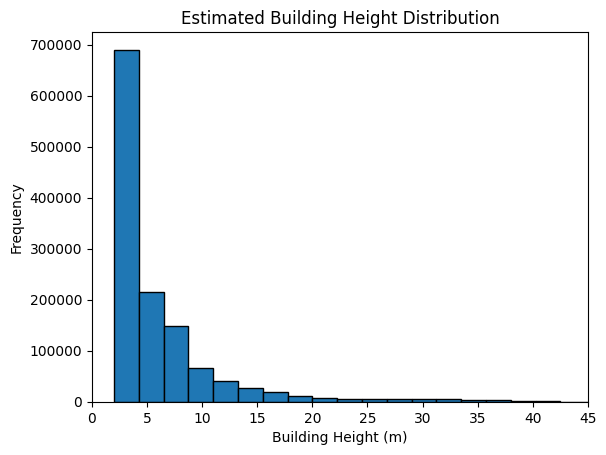

In [19]:
# visualize the distribution of estimated_building_height
plt.hist(df['estimated_building_height'], bins=70, edgecolor='black')

plt.xlim([0, 45])
plt.title("Estimated Building Height Distribution")
plt.xlabel('Building Height (m)')
plt.ylabel('Frequency')

plt.show()

We see our distribution is right skewed with most building height between 3-4 metres (which is common for most residential_buildings).

Let's visualize the distribution for each unique features in `estimated_building_height`

In [20]:
# Count the number of buildings in each type
print(df['assumed_building_type'].value_counts())


assumed_building_type
single-family_residential    1282749
commercial                     87120
public                         26264
multi-family_residential       25252
industrial                     21839
schools                        16197
public_health_facilities        7114
hotels                          3906
Name: count, dtype: int64


In [21]:
# Filter for residential, industrial, and commercial buildings
single_family = df[df['assumed_building_type'] == 'single-family_residential']
commercial= df[df['assumed_building_type'] == 'commercial']
public= df[df['assumed_building_type'] == 'public']
multi_family = df[df['assumed_building_type'] == 'multi-family_residential']
industrial = df[df['assumed_building_type'] == 'industrial']
schools = df[df['assumed_building_type'] == 'schools']
public_health = df[df['assumed_building_type'] == 'public_health_facilities']
hotels = df[df['assumed_building_type'] == 'hotels']

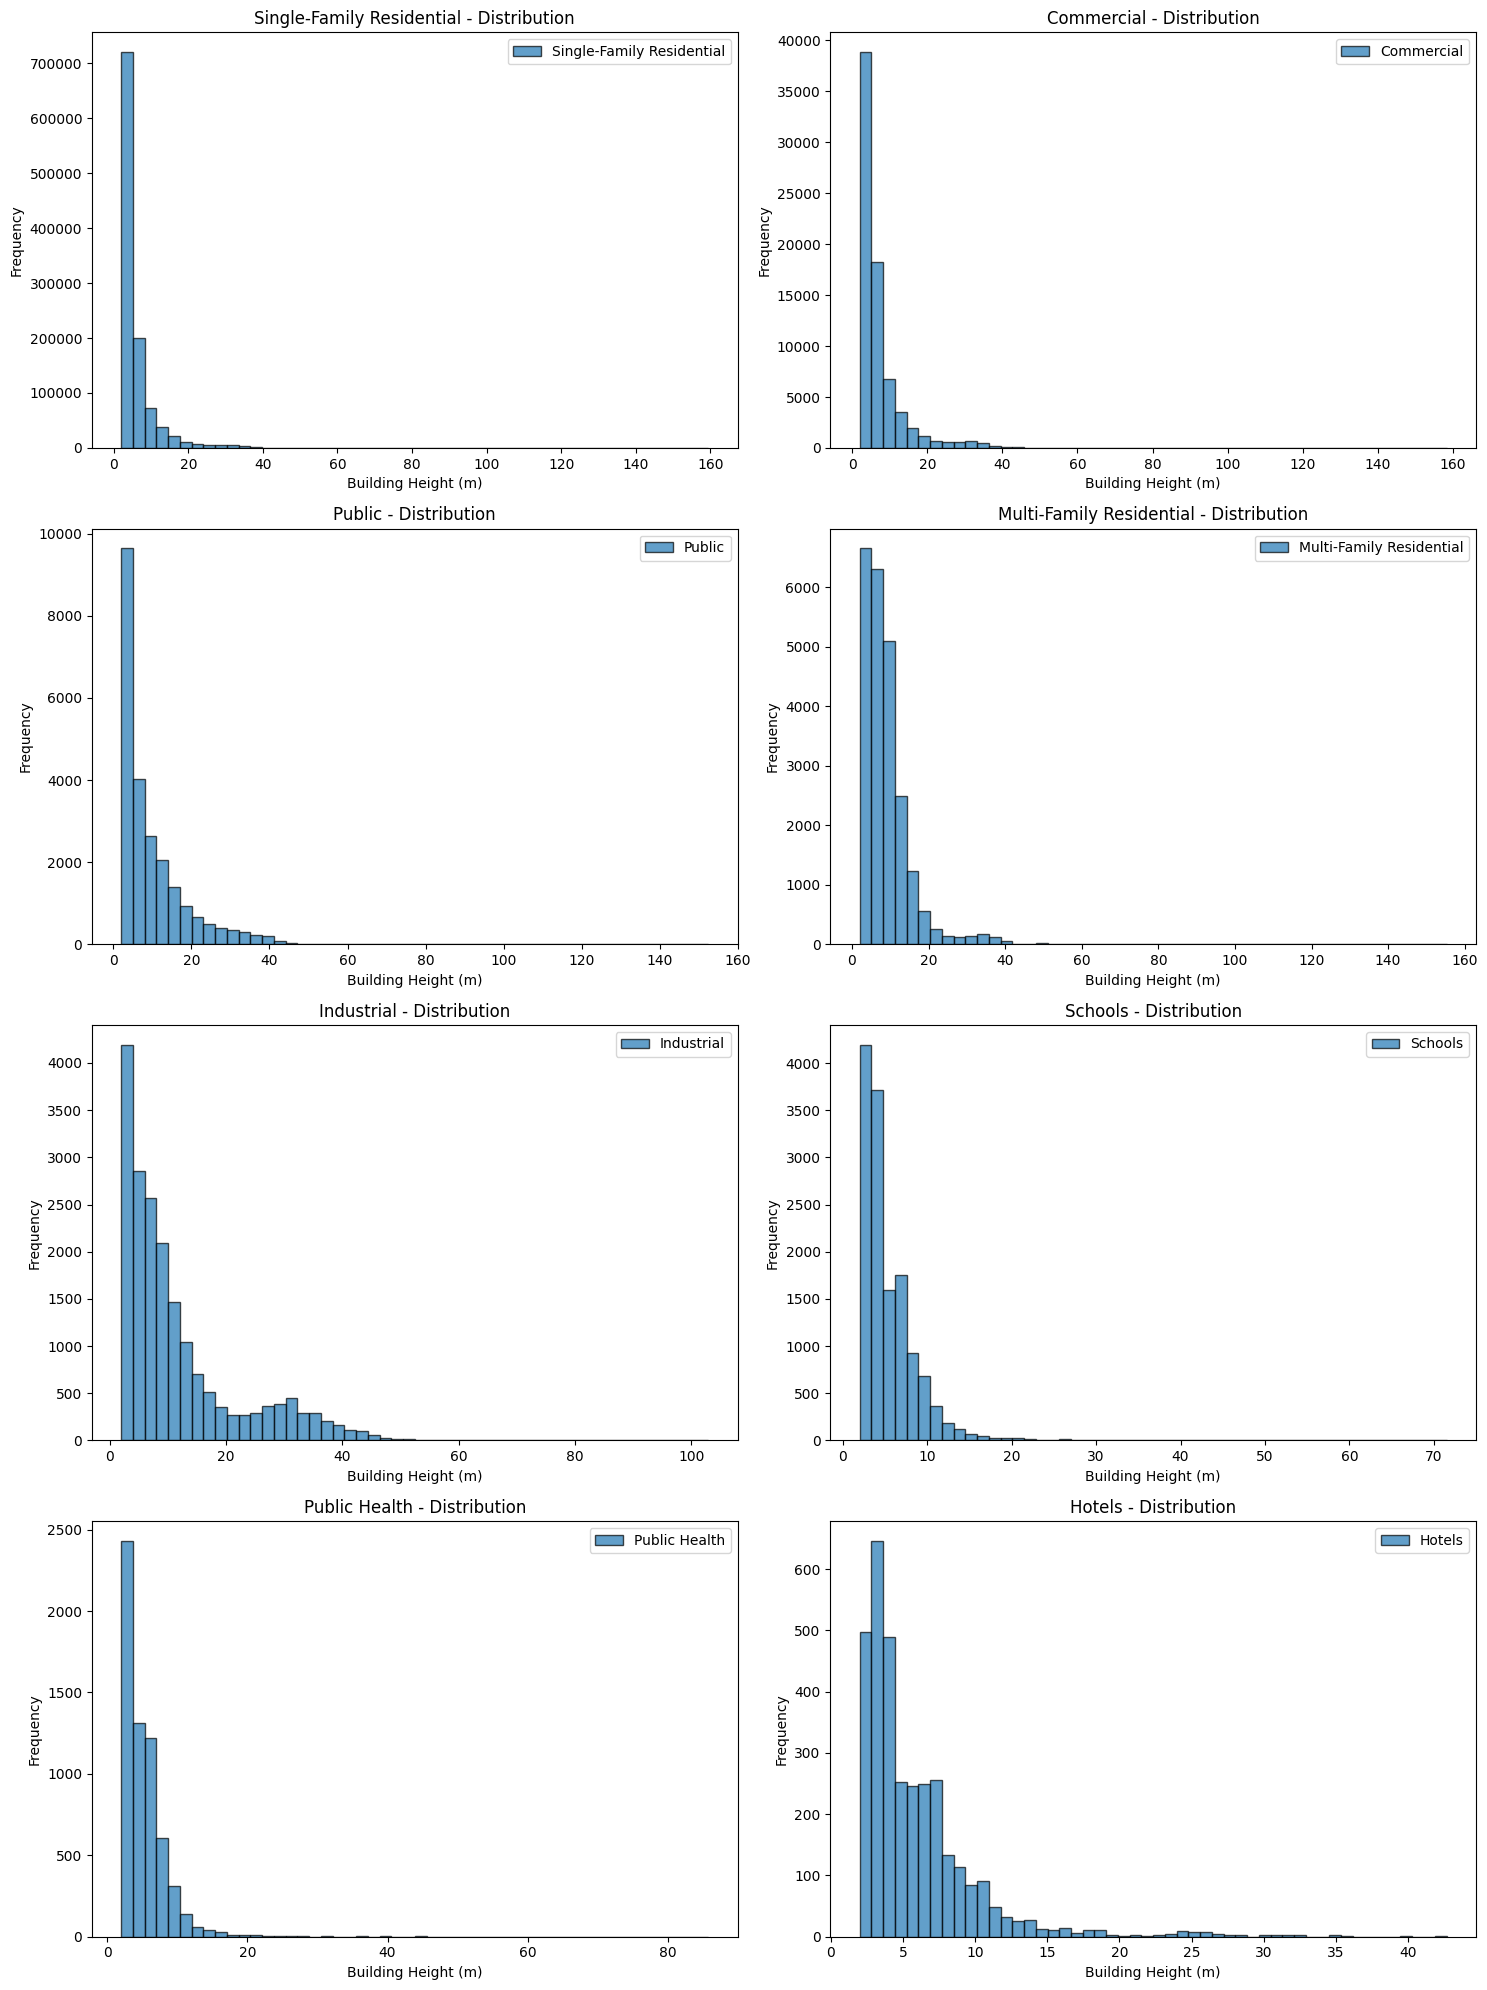

In [22]:
# Plot histograms for each building type side by side
building_types = {
    "Single-Family Residential": single_family,
    "Commercial": commercial,
    "Public": public,
    "Multi-Family Residential": multi_family,
    "Industrial": industrial,
    "Schools": schools,
    "Public Health": public_health,
    "Hotels": hotels
}

# Determine the layout of subplots
num_plots = len(building_types)
cols = 2
rows = (num_plots + cols - 1) // cols

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

# Plot each distribution
for i, (name, subset) in enumerate(building_types.items()):
    ax = axes[i]
    ax.hist(subset['estimated_building_height'], bins=50, alpha=0.7, label=name, edgecolor='black')
    ax.set_title(f"{name} - Distribution")
    ax.set_xlabel('Building Height (m)')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()


Our building height varies significantly by building type (e.g., single_residential vs. industrial). Let's calculate the median separately for each group and fill in.

In [23]:
# fill in missing value by the median value of each building type
df['estimated_building_height'] = df.groupby('assumed_building_type')['estimated_building_height'].transform(lambda x: x.fillna(x.median()))

In [24]:
df.isna().sum()

surface_area                         0
potential_installable_area           0
peak_installable_capacity            0
energy_potential_per_year            0
assumed_building_type                0
estimated_tilt                       0
estimated_building_height            0
estimated_capacity_factor            0
estimated_installation_efficiency    0
lga                                  0
roof_quality                         0
solar_panels                         0
dtype: int64

In [25]:
# new data shape
df.shape

(1470441, 12)

In [26]:
# save the clean data
df.to_csv('df_cleaned_data.csv', index=False)

# Conclusion

Now that we are done cleaning our dataset, let's build an interactive dashboard using Power BI to visualize solar potential across Lagos, enabling stakeholders to explore key metrics like energy output, installation capacity, and building suitability.